# Fruits Detection with CNN

> Fernando Julian
>
> 09011381924087
>
> SK5 Palembang
>
> Artificial Intelligence Project

### Papers

[Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.](https://www.researchgate.net/publication/321475443_Fruit_recognition_from_images_using_deep_learning)


### Deep Learning

Deep learning adalah salah satu cabang machine learning (ML) yang menggunakan deep neural network untuk menyelesaikan permasalahan pada domain ML. Neural network sendiri adalah model yang terinspirasi oleh bagaimana neuron dalam otak manusia bekerja. Tiap neuron pada otak manusia saling berhubungan dan informasi mengalir dari setiap neuron tersebut.

### Convolutional Neural Network

Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. CNN bisa digunakan untuk mendeteksi dan mengenali object pada sebuah image.

#### 1. Convolutional Layer
Proses konvolusi memanfaatkan apa yang disebut sebagai filter. Seperti layaknya gambar, filter memiliki ukuran tinggi, lebar, dan tebal tertentu. Filter ini diinisialisasi dengan nilai tertentu (random atau menggunakan teknik tertentu seperti Glorot), dan nilai dari filter inilah yang menjadi parameter yang akan di-update dalam proses learning.

#### 2. Fungsi Aktivasi
Fungsi aktivasi berada pada tahap sebelum melakukan pooling layer dan setelah melakukan proses konvolusi. Pada tahap ini, nilai hasil konvolusi dikenakan fungsi aktivasi atau activation function. Fungsi yang digunakan untuk aktivasi kali ini menggunakan reLU.

#### 3. Pooling Layer
Bagian berikutnya dari CNN adalah pooling layer. Fungsi dari pooling ini adalah untuk mereduksi input secara spasial (mengurangi jumlah parameter) dengan operasi down-sampling. 

Secara umum, CNN adalah kumpulan dari convolutional layer, beberapa function, dan pooling layer.

## Cara kerja CNN

1. Memecah gambar menjadi gambar yang lebih kecil yang tumpang tindih
2. Memasukkan setiap gambar yang lebih kecil ke small neural network
3. Menyimpan hasil dari masing-masing gambar kecil ke dalam array baru
4. Downsampling
5. Membuat prediksi

![Ilustrasi](ilustrasi.gif "ilustrasi")

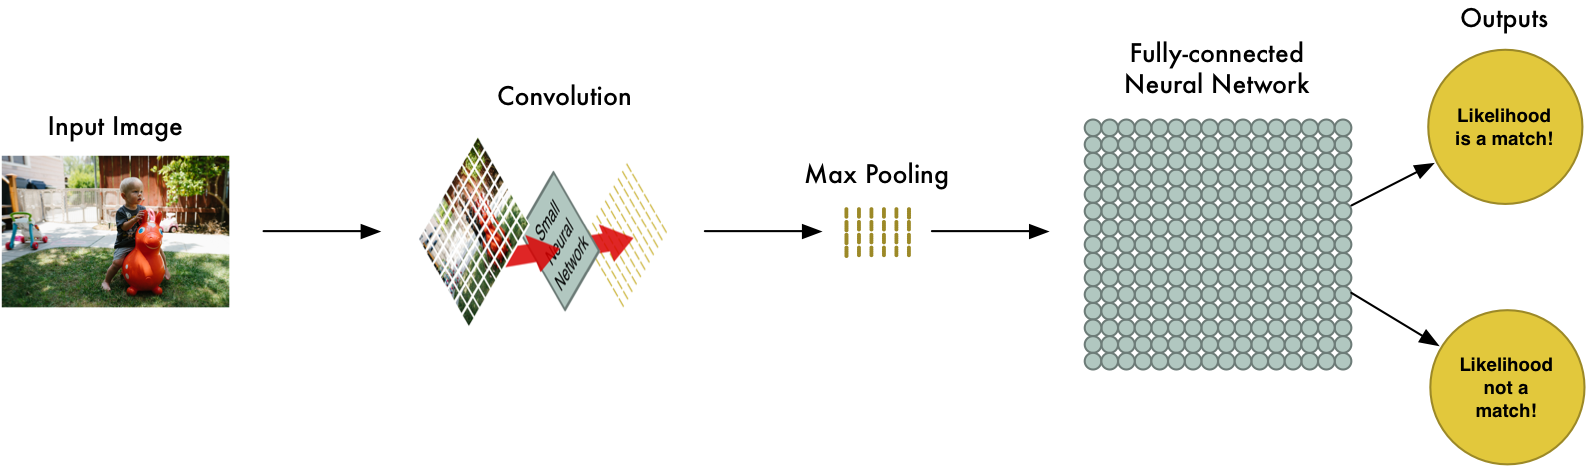

## Import Library

In [1]:
import numpy as np 
import pandas as pd 
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

## Dataset


Dataset ini dapat di download di : [Kaggle/dataset](https://github.com/Horea94/Fruit-Images-Dataset)

Pada proses ini, kita mengimport dataset kedalam notebook yang selanjutnya akan diproses menjadi array sehingga dataset ini nantinya dapat kita olah.

In [2]:
from sklearn.datasets import load_files
import numpy as np

train_dir = r'C:\Users\nando\Desktop\Tugas Kuliah\Kecerdasan Buatan\Fruits-360-CNN-master\dataset\Training'
test_dir = r'C:\Users\nando\Desktop\Tugas Kuliah\Kecerdasan Buatan\Fruits-360-CNN-master\dataset\Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  67692
Testing set size :  22688


In [3]:
no_of_classes = len(np.unique(y_train))
no_of_classes

131

#### Converts a class vector (integers) to binary class matrix.

In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

![SegmentLocal](ilustrasi2.gif "segment")

#### Split arrays or matrices into random train and test subsets

In [5]:
from sklearn.model_selection import  train_test_split
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.2,random_state=42)

In [6]:
x_valid.shape, y_valid.shape

((4538,), (4538, 131))

In [7]:
x_test.shape,y_test.shape

((18150,), (18150, 131))

In [8]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (4538, 100, 100, 3)
Test set shape :  (18150, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [9]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

## CNN

Berikut ini adalah Proses pembuatan model Convolutional Neural Networknya
Pada Proses ini kita mengatur model yang akan digunakan dalam CNN kita, seperti padding, fungsi aktivasi dll

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout,Activation,BatchNormalization
from keras.optimizer_v2 import adamax as adamax_v2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(131,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0

- Angka 4608 pada flatten layer didapatkan dari dimensi sebelumnya yaitu 12x12x32 = 4608.
- Angka 1024 pada dense_1 layer menunjukkan banyaknya neuron yang digunakan.
- Angka 131 pada dense_2 layer menunjukkan banyaknya kategori atau class yang ada.

## Model Compile

Pada tahap ini, kita akan melakukan compiling model yang akan digunakan pada CNN-nya nanti. Disini kita melakukan compile dengan Adamax sebagai Algoritma Optimizernya dengan metrics accuracy sebagai penilaian kinerjanya.

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

## Proses Learning

In [13]:
learned_weights = ModelCheckpoint(filepath = 'fruits_360_weights_1.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 50,
        epochs=30,
        validation_data=(x_valid, y_valid),
        callbacks = [learned_weights],
        verbose=2, shuffle=True)

Epoch 1/30
1354/1354 - 301s - loss: 1.3769 - accuracy: 0.6567 - val_loss: 0.3473 - val_accuracy: 0.9088

Epoch 00001: val_loss improved from inf to 0.34734, saving model to fruits_360_weights_1.hdf5
Epoch 2/30
1354/1354 - 303s - loss: 0.1772 - accuracy: 0.9448 - val_loss: 0.2388 - val_accuracy: 0.9513

Epoch 00002: val_loss improved from 0.34734 to 0.23881, saving model to fruits_360_weights_1.hdf5
Epoch 3/30
1354/1354 - 301s - loss: 0.0752 - accuracy: 0.9761 - val_loss: 0.1830 - val_accuracy: 0.9707

Epoch 00003: val_loss improved from 0.23881 to 0.18295, saving model to fruits_360_weights_1.hdf5
Epoch 4/30
1354/1354 - 291s - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.1745 - val_accuracy: 0.9718

Epoch 00004: val_loss improved from 0.18295 to 0.17453, saving model to fruits_360_weights_1.hdf5
Epoch 5/30
1354/1354 - 295s - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.2268 - val_accuracy: 0.9599

Epoch 00005: val_loss did not improve from 0.17453
Epoch 6/30
1354/1354 - 293s - loss: 

In [14]:
model.load_weights('fruits_360_weights_1.hdf5')

## Akurasi

In [15]:
accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy[1])

0.9799448847770691


Akurasi pada model yang sudah melalui proses learning didapatkan sebesar 0.9799448847770691. Ini termasuk bagus mengingat nilai ini mendekati 1 yang mana nilai sempurna.

## Hasil Prediksi



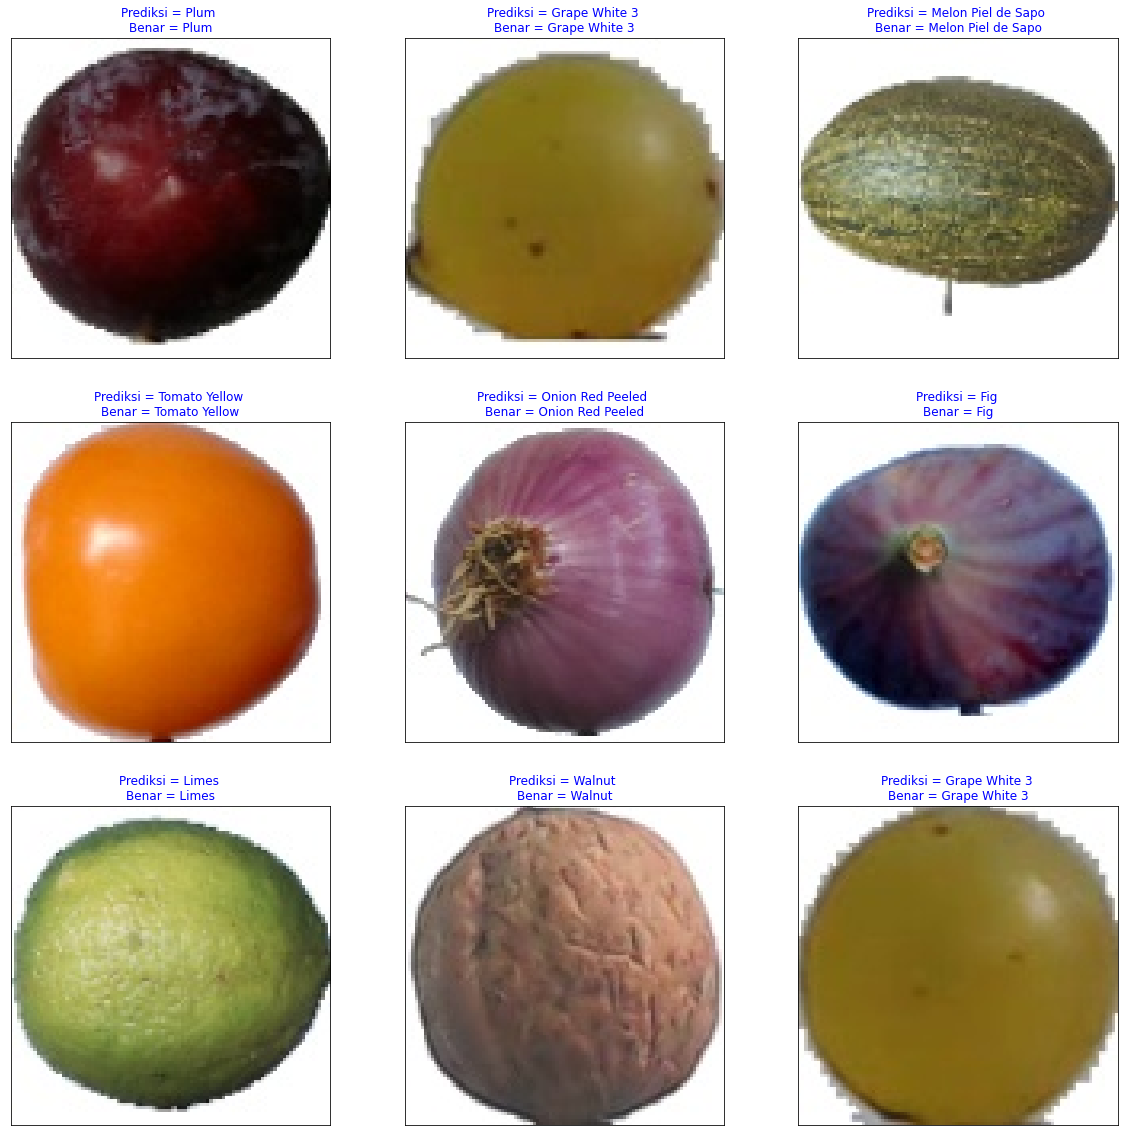

In [19]:
from matplotlib import pyplot as plt
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("Prediksi = {} \nBenar = {}".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "black"))
    plt.savefig('foo.png')